Importing Packages Required for cycle sharing scheme dataset


In [1]:
%matplotlib inline
import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn 

Loading the data into memory

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/KanishkaSingh2396/python-ml-case-studies/master/datasets/Chapter%201/trip.csv')

Printing Size of the Dataset and Printing First Few Rows

In [3]:
print(len(data))
data.head()

236065


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


Determining the Time Range of the Dataset

In [4]:
print("Date range of dataset:", data["starttime"].iloc[0], "-" , data["stoptime"].iloc[-1])

Date range of dataset: 10/13/2014 10:31 - 9/1/2016 0:20


Plotting the Distribution of User Types

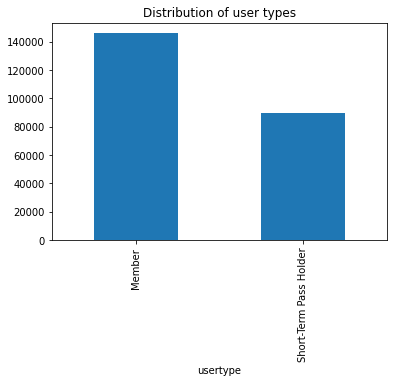

In [5]:
groupby_user = data.groupby('usertype').size()
groupby_user.plot.bar(title = 'Distribution of user types')


Plotting the Distribution of Gender


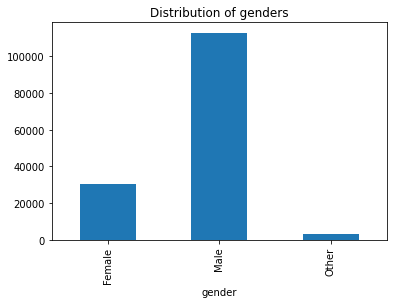

In [6]:
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title = 'Distribution of genders')

Plotting the Distribution of Birth Years

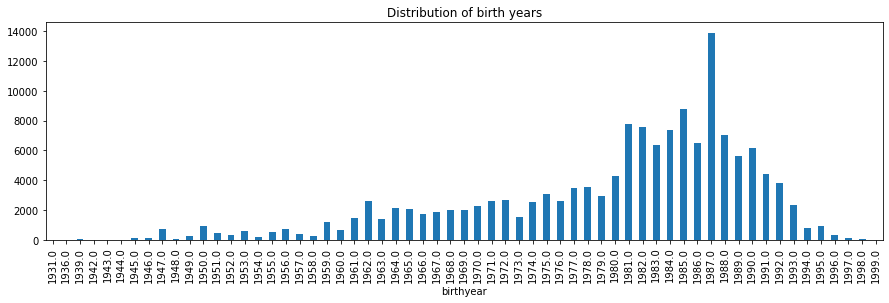

In [7]:
data = data.sort_values(by='birthyear')
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title = 'Distribution of birth years', figsize = (15,4))

Plotting the Frequency of Member Types for Millenials

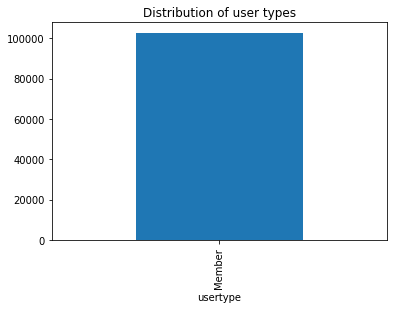

In [8]:
data_mil = data[(data['birthyear'] >= 1977) & (data['birthyear']<=1994)]
groupby_mil = data_mil.groupby('usertype').size()
groupby_mil.plot.bar(title = 'Distribution of user types')

Multivariate Analysis

Plotting the Distribution of Birth Years by Gender Type

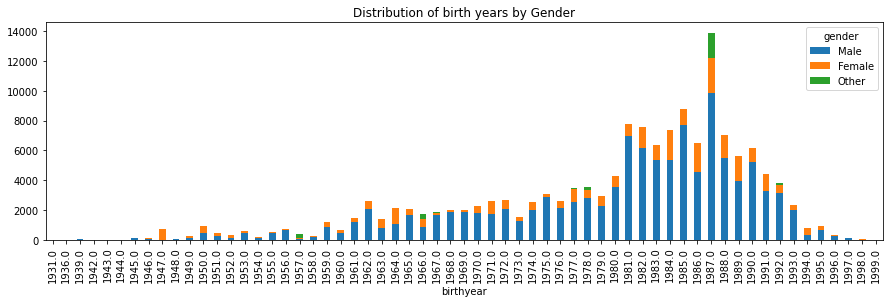

In [9]:
groupby_birthyear_gender = data.groupby(['birthyear', 'gender'])['birthyear'].count().unstack('gender').fillna(0)
groupby_birthyear_gender[['Male','Female','Other']].plot.bar(title = 
'Distribution of birth years by Gender', stacked=True, figsize = (15,4))

Plotting the Distribution of Birth Years by User Types

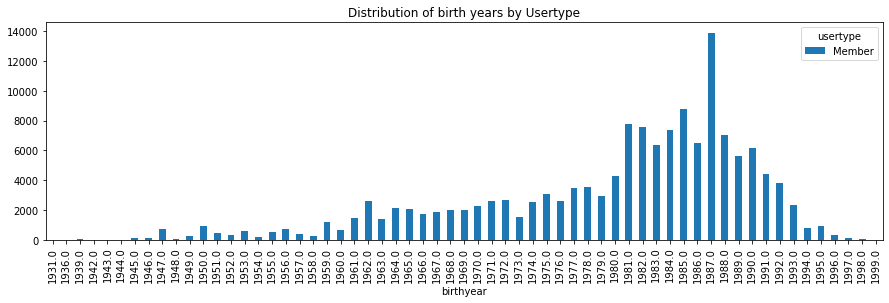

In [10]:
groupby_birthyear_user = data.groupby(['birthyear', 'usertype'])['birthyear'].count().unstack('usertype').fillna(0)
groupby_birthyear_user[['Member']].plot.bar(title = 'Distribution of birth years by Usertype', stacked=True, figsize = (15,4))

Validation If We Don’t Have Birth Year Available for Short-Term Pass Holders

In [11]:
data[data['usertype']=='Short-Term Pass Holder']['birthyear'].isnull().values.all()

True

Validation If We Don’t Have Gender Available for Short-Term Pass Holders

In [12]:
data[data['usertype']=='Short-Term Pass Holder']['gender'].isnull().values.all()

True

Converting String to datetime, and Deriving New Features

At first we converted start time column of the dataframe into a list. 
Next we converted the string dates into python datetime objects. We 
then converted the list into a series object and converted the dates from 
datetime object to pandas date object. The time components of year, 
month, day and hour were derived from the list with the datetime objects.

In [13]:
List_ = list(data['starttime'])
List_ = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M") for x in List_]
data['starttime_mod'] = pd.Series(List_,index=data.index)
data['starttime_date'] = pd.Series([x.date() for x in List_],index=data.index)
data['starttime_year'] = pd.Series([x.year for x in List_],index=data.index)
data['starttime_month'] = pd.Series([x.month for x in List_],index=data.index)
data['starttime_day'] = pd.Series([x.day for x in List_],index=data.index)
data['starttime_hour'] = pd.Series([x.hour for x in List_],index=data.index)


Plotting the Distribution of Trip Duration over Daily Time

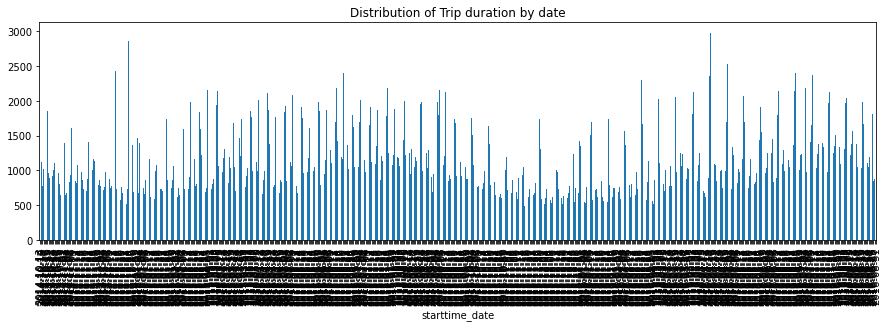

In [14]:
data.groupby('starttime_date')['tripduration'].mean().plot.bar(title = 
'Distribution of Trip duration by date', figsize = (15,4))

Determine the distribution of number of trips by year

In [15]:
data.head(2)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,starttime_mod,starttime_date,starttime_year,starttime_month,starttime_day,starttime_hour
212893,231080,7/8/2016 16:22,7/8/2016 16:53,SEA00423,1817.524,E Pine St & 16th Ave,E Pine St & 16th Ave,CH-07,CH-07,Member,Female,1931.0,2016-07-08 16:22:00,2016-07-08,2016,7,8,16
116857,129270,8/15/2015 18:07,8/15/2015 18:16,SEA00393,521.017,2nd Ave & Pine St,Terry Ave & Stewart St,CBD-13,SLU-20,Member,Male,1936.0,2015-08-15 18:07:00,2015-08-15,2015,8,15,18


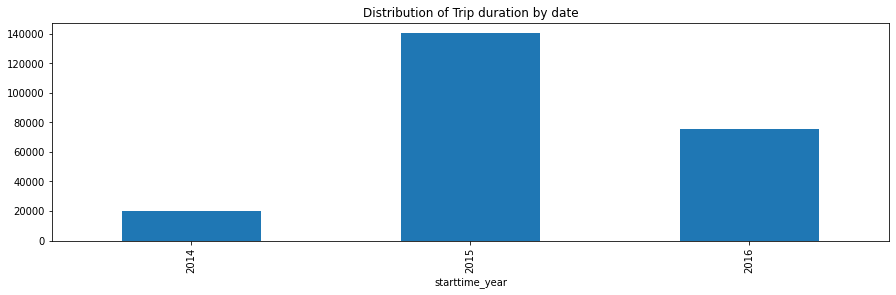

In [16]:
data.groupby('starttime_year')['trip_id'].count().plot.bar(title = 
'Distribution of Trip duration by date', figsize = (15,4))

Determine the distribution of number of trips by month

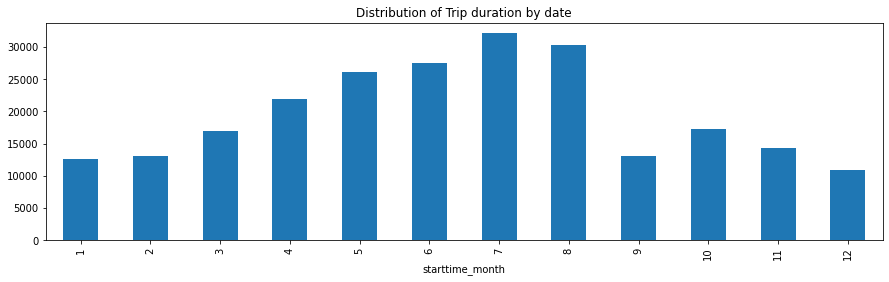

In [17]:
data.groupby('starttime_month')['trip_id'].count().plot.bar(title = 
'Distribution of Trip duration by date', figsize = (15,4))

Determine the distribution of number of trips by day

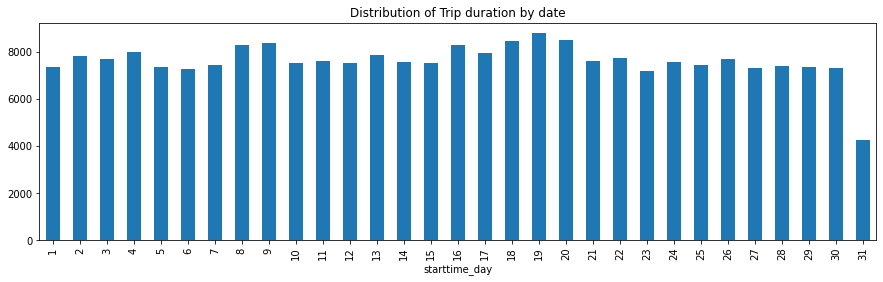

In [18]:
data.groupby('starttime_day')['trip_id'].count().plot.bar(title = 
'Distribution of Trip duration by date', figsize = (15,4))

Determine the distribution of number of trips by hour

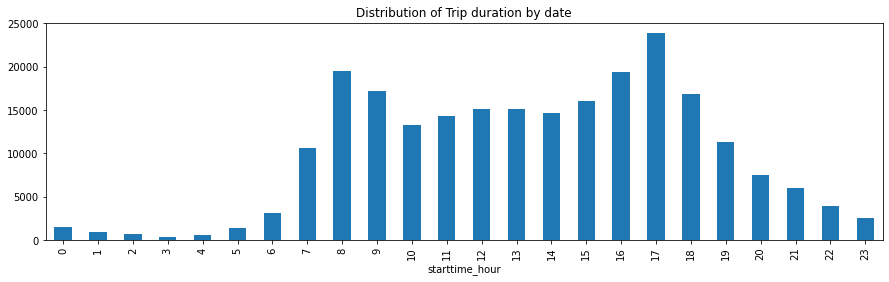

In [19]:
data.groupby('starttime_hour')['trip_id'].count().plot.bar(title = 
'Distribution of Trip duration by date', figsize = (15,4))

Determining the measures of centers using the statistics package will require us 
to transform the input data structure to a list type

Determining the Measures of Center Using Statistics Package

In [20]:
trip_duration = list(data['tripduration'])
station_from = list(data['from_station_name'])
print("trip duration Mean:", statistics.mean(trip_duration), ",", "trip duration Median:", statistics.mean(trip_duration), ",", "trip duration Mode:", statistics.mode(station_from))

trip duration Mean: 1202.6122102556499 , trip duration Median: 1202.6122102556499 , trip duration Mode: Pier 69 / Alaskan Way & Clay St


Plotting Histogram of Trip Duration

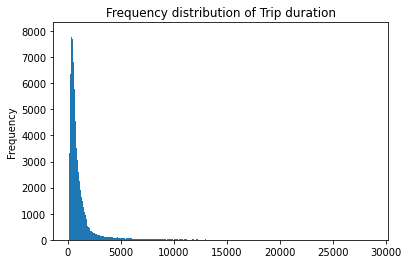

In [21]:
data['tripduration'].plot.hist(bins=1000, title='Frequency distribution of Trip duration')
plt.show()

Plotting a Box plot of Trip Duration

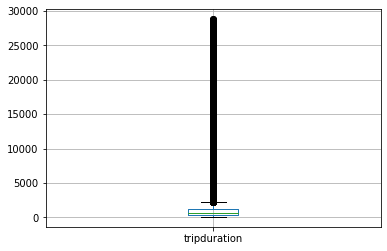

In [22]:
box = data.boxplot(column=['tripduration'])
plt.show()

Determining Ratio of Values in Observations of tripduration Which Are 
Outliers

Number of outliers values = Length of all values - Length of all non 
outliers values

In our code, len(data) determines Length of all values and Length of all non outliers
values is determined by len([x for x in trip_duration if q75+(1.5*iqr) >=x>= 
q25-(1.5*iqr)]))

In [23]:
q75, q25 = np.percentile(trip_duration, [75 ,25])
iqr = q75 - q25
print ('Proportion of values as outlier: %f percent'%(
(len(data) - len([x for x in trip_duration if q75+(1.5*iqr) 
>=x>= q25-(1.5*iqr)]))*100/float(len(data))))

Proportion of values as outlier: 9.548218 percent


Calculating z scores for Observations Lying Within tripduration

In [24]:
mean_trip_duration = np.mean([x for x in trip_duration if q75+(1.5*iqr) 
>=x>= q25-(1.5*iqr)])
upper_whisker = q75+(1.5*iqr)
print ('Mean of trip duration: %f' %mean_trip_duration)

Mean of trip duration: 711.726573


Calculating Mean Scores for Observations Lying Within tripduration

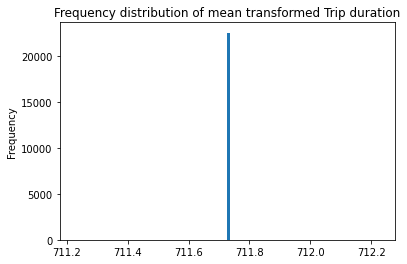

In [25]:
def transform_tripduration(x):
 if x > upper_whisker:
    return mean_trip_duration
    return x
data['tripduration_mean'] = data['tripduration'].apply(lambda x: transform_tripduration(x))
data['tripduration_mean'].plot.hist(bins=100, title='Frequency distribution of mean transformed Trip duration')
plt.show()

Deternining the Measures of Center in Absence of Outliers

In [27]:
print ('Mean of trip duration: %f'%data['tripduration_mean'].mean())

print ('Standard deviation of trip duration: %f'%data['tripduration_mean'].std())
print ('Median of trip duration: %f'%data['tripduration'].median())

Mean of trip duration: 711.726573
Standard deviation of trip duration: 0.000000
Median of trip duration: 633.235000


Pairplot of trip duration and age

In [51]:
data.head(2)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,starttime_mod,starttime_date,starttime_year,starttime_month,starttime_day,starttime_hour,tripduration_mean
55921,64488,4/26/2015 10:58,4/26/2015 11:45,SEA00140,2794.167,15th Ave E & E Thomas St,12th Ave & E Mercer St,CH-05,CH-15,Member,Male,1939.0,2015-04-26 10:58:00,2015-04-26,2015,4,26,10,711.726573
69528,78890,5/25/2015 10:30,5/25/2015 12:18,SEA00042,6482.742,12th Ave & E Mercer St,12th Ave & E Mercer St,CH-15,CH-15,Member,Male,1939.0,2015-05-25 10:30:00,2015-05-25,2015,5,25,10,711.726573


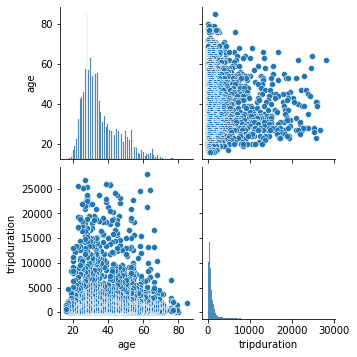

In [28]:
data['age'] = data['starttime_year'] - data['birthyear']
seaborn.pairplot(data, vars=['age', 'tripduration'], dropna=True)
plt.show()

Correlation Coefficient Between trip duration and age

In [29]:
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
data['age'] = data['starttime_year'] - data['birthyear']
correlations = data[['tripduration','age']].corr(method='pearson')
print(correlations)

              tripduration    age
tripduration         1.000  0.058
age                  0.058  1.000


Computing Two-Tail t-test of Categories of gender and user types

In [46]:
for cat in ['gender','usertype']:
 print ('Category: %s\n'%cat)
 groupby_category = data.groupby(['starttime_date', cat])['starttime_date'].count().unstack(cat)
 groupby_category = groupby_category.dropna()
 category_names = list(groupby_category.columns)
 for comb in [(category_names[i],category_names[j]) for i in 
  range(len(category_names)) for j in range(i+1, len(category_names))]:
    print ('%s %s'%(comb[0], comb[1]))
    t_statistics = stats.ttest_ind(list(groupby_category[comb[0]]), 
    list(groupby_category[comb[1]]))
    print ('Statistic: %f, P value: %f'%(t_statistics.statistic, t_statistics.pvalue))
    print ('\n')

Category: gender

Female Male
Statistic: -38.572176, P value: 0.000000


Female Other
Statistic: 48.248666, P value: 0.000000


Male Other
Statistic: 53.180282, P value: 0.000000


Category: usertype

Member Short-Term Pass Holder
Statistic: 14.393456, P value: 0.000000




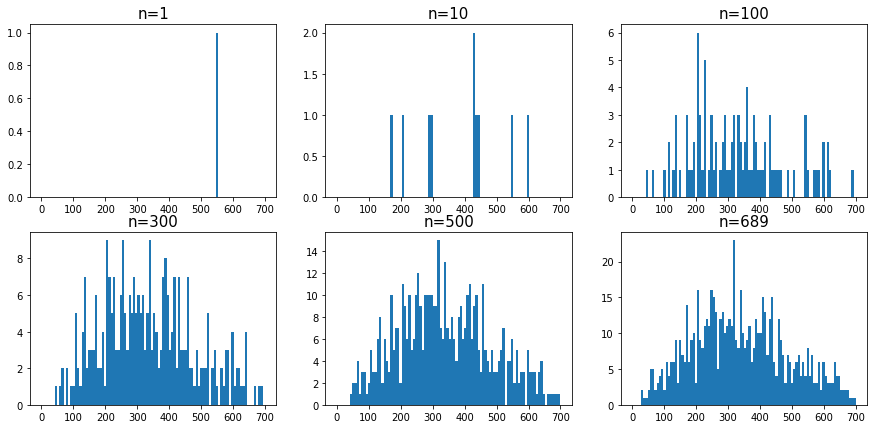

In [50]:
daily_tickets = list(data.groupby('starttime_date').size())
sample_tickets = []
checkpoints = [1, 10, 100, 300, 500, 1000]
plot_count = 1
random.shuffle(daily_tickets)
plt.figure(figsize=(15,7))
binrange=np.array(np.linspace(0,700,101))
for i in range(1000):
  if daily_tickets:
    sample_tickets.append(daily_tickets.pop())
  if i+1 in checkpoints or not daily_tickets:
     plt.subplot(2,3,plot_count)
     plt.hist(sample_tickets, binrange)
     plt.title('n=%d' % (i+1),fontsize=15) 
     plot_count+=1
     if not daily_tickets:
       break
plt.show()
 

Central Limit Theorem
Script to Validate Central Limit Theorem on Trips Dataset